<a href="https://colab.research.google.com/github/dzakwanilhakim/brainstorm_automation/blob/main/Tugas_FK_Oral_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oral Toxicity prediction with SVM dan MLP**

# **0. Import Data**

## 0.1 Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2 Import dataset

In [ ]:
# import data without column name
data = pd.read_csv('qsar_oral_toxicity.csv', sep = ";", header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


## 0.3 data type check

In [ ]:
# check data type
data.dtypes


,0
0,int64
1,int64
2,int64
3,int64
4,int64
...,...
1020,int64
1021,int64
1022,int64
1023,int64


In [ ]:
# is column 0 - 1023 is in integer format?
data.iloc[:, 0:1023].dtypes


,0
0,int64
1,int64
2,int64
3,int64
4,int64
...,...
1018,int64
1019,int64
1020,int64
1021,int64


In [ ]:
cols_to_check = data.iloc[:, :1024]
all_integer = all(pd.api.types.is_integer_dtype(data[col]) for col in cols_to_check.columns)

# Print "Yes" or "No"
print("Is all column 1 - 1024 in integer format?:")
print("Yes" if all_integer else "No")

Is all column 1 - 1024 in integer format?:
Yes


All column 1 - 1024 is in integer format, and last column is in object format

# **1. Data Preprocessing**

## 1.1 Check for missing value (NA)

In [ ]:
# Check NA for all column in percentage 2 point decimal
null_percentage = data.isna().sum()/len(data)*100
null_percentage

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1020,0.0
1021,0.0
1022,0.0
1023,0.0


In [ ]:
print("is there are no missing values for all Attributes?:")
print("Yes" if null_percentage.eq(0).all() else "No")

is there are no missing values for all Attributes?:
Yes


There are no missing values in all attributes

## 1.2 Is the class balance?

In [ ]:
# label count
data[1024].value_counts()/len(data)*100

,count
1024,
negative,91.759342
positive,8.240658


91.76% label in negative class, 8.24% label in positive class. The class is imbalance.

## 1.3 Data splitting

Splitted the dataset into 70%:30% Train set and test set respectively.

In [ ]:
# encoding negative as 0 and positive as 1
data[1024] = data[1024].map({'negative': 0, 'positive': 1})

In [ ]:
corr_matrix = data.corr()
corr_with_label = corr_matrix[1024].drop(1024).abs()
corr_with_label.sort_values(ascending=False)

,1024
282,0.255304
37,0.221726
591,0.213440
453,0.210845
559,0.196668
...,...
76,0.000144
767,0.000043
504,0.000037
422,0.000037


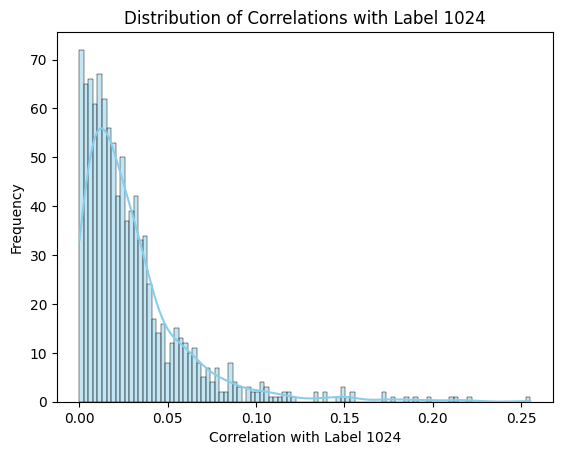

In [ ]:
# Assuming corr_with_label is already defined as per your code
sns.histplot(corr_with_label, kde=True, bins=100, color='skyblue')

# Add labels and title
plt.title('Distribution of Correlations with Label 1024')
plt.xlabel('Correlation with Label 1024')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
# splitting data 7:3
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]  # Select all columns except the last one
y = data.iloc[:, -1]  # Select the last column (assuming it's the label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
#value counts for y_train
print("Train set: ", y_train.value_counts())
print("Test set: ", y_test.value_counts())

Train set:  1024
0    5780
1     514
Name: count, dtype: int64
Test set:  1024
0    2471
1     227
Name: count, dtype: int64


# **2. Exporatory Data Analysis**

How is the distribution of the data?

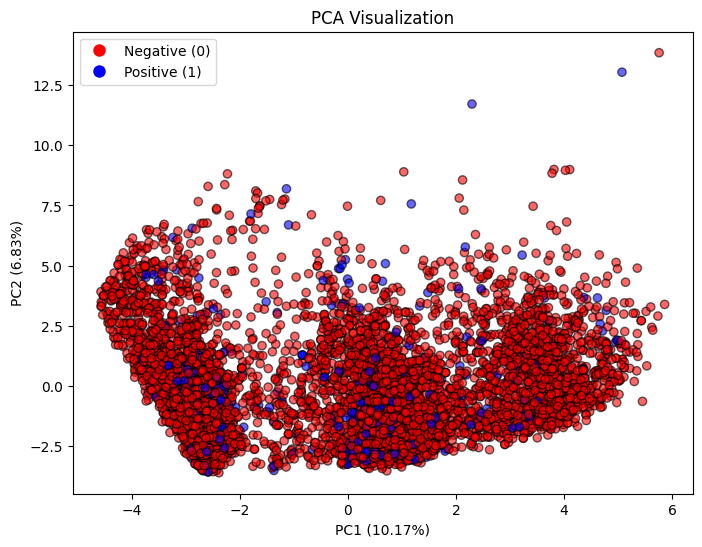

In [ ]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_train)

# Calculate variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
pc1_var = explained_variance_ratio[0] * 100
pc2_var = explained_variance_ratio[1] * 100

# Create a scatter plot
plt.figure(figsize=(8, 6))
colors = ['red' if label == 0 else 'blue' for label in y_train]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, edgecolor='k', label='Data')

# Add labels and legend
plt.xlabel(f'PC1 ({pc1_var:.2f}%)')
plt.ylabel(f'PC2 ({pc2_var:.2f}%)')
plt.title('PCA Visualization')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Negative (0)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Positive (1)')
])
plt.show()

The PC1 and PC2 Variance is too small, the distribution also very heterogenous.

Feature selection and normalization is not carried out beacuse all attributes is in binary value and all attributes represents molecular fingerprint

# **3. Model Training and Evaluation**

Evaluation metrics function

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay
)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class EvaluateModels:
    def evaluate_model_with_metrics(self, model, X_train, X_test, y_train, y_test):
        """
        Evaluates a model on train and test sets, printing and returning evaluation metrics.
        Assumes the model is already trained.
        """
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
        y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate metrics
        metrics = {
            "Train Accuracy": accuracy_score(y_train, y_train_pred) * 100,
            "Test Accuracy": accuracy_score(y_test, y_test_pred) * 100,
            "Train Precision": precision_score(y_train, y_train_pred) * 100,
            "Test Precision": precision_score(y_test, y_test_pred) * 100,
            "Train Recall": recall_score(y_train, y_train_pred) * 100,
            "Test Recall": recall_score(y_test, y_test_pred) * 100,
            "Train F1 Score": f1_score(y_train, y_train_pred) * 100,
            "Test F1 Score": f1_score(y_test, y_test_pred) * 100,
            "Train ROC AUC": roc_auc_score(y_train, y_train_proba) * 100 if y_train_proba is not None else None,
            "Test ROC AUC": roc_auc_score(y_test, y_test_proba) * 100 if y_test_proba is not None else None,
        }

        # Print metrics with structured formatting
        print("\nTrain/Test Metrics")
        for key, value in metrics.items():
            if "Train" in key:
                print(f"\n{key:<15}: {value:>6.2f}%")
            else:
                print(f"{key:<15}: {value:>6.2f}%")

        # Return metrics DataFrame and test predictions
        return pd.DataFrame.from_dict(metrics, orient="index", columns=["Score"]), y_test_pred

    def plot_confusion_matrix(self, y_test, y_pred, title, labels=None, figsize=(7, 7)):
        """
        Plots the confusion matrix normalized by true labels, displayed as percentages with a color bar.

        Parameters:
        - y_test: Ground truth labels.
        - y_pred: Predicted labels.
        - title: Title for the plot.
        - labels: List of label values (e.g., [0, 1]). Defaults to inferred labels.
        - figsize: Tuple for figure size (width, height). Default is (7, 7).
        """
        # Infer labels if not provided
        if labels is None:
            labels = sorted(set(y_test) | set(y_pred))  # Combine unique labels from y_test and y_pred

        # Generate the confusion matrix normalized by true labels
        cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

        # Convert values to percentages
        cm_percentage = cm * 100

        # Plot the normalized confusion matrix as percentages
        plt.figure(figsize=figsize)  # Use the provided figsize
        sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap='Reds', cbar=True,
                    xticklabels=['Negative (0)', 'Positive (1)'],
                    yticklabels=['Negative (0)', 'Positive (1)'])
        plt.title(title)
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()


def plot_roc_auc(models, model_names, X_test, y_test):
    """
    Plots ROC-AUC curves for multiple models on a single plot.

    Parameters:
        models: List of trained models.
        model_names: List of model names (same order as models).
        X_test: Test feature data.
        y_test: Test target data.
    """
    if len(models) != len(model_names):
        raise ValueError("Length of `models` and `model_names` must be the same.")

    plt.figure(figsize=(10, 7))
    for model, name in zip(models, model_names):
        if hasattr(model, "predict_proba"):
            y_test_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_test_proba = model.decision_function(X_test)
        else:
            print(f"Model {name} does not support ROC-AUC computation and is skipped.")
            continue

        RocCurveDisplay.from_predictions(y_test, y_test_proba, name=name, ax=plt.gca())

    plt.title("ROC-AUC Curves for Different Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


## 3.1 SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42, kernel = 'rbf', gamma = 5, C = 1)  # SVM needs `probability=True` for ROC-AUC
svm_model.fit(X_train, y_train)


SVC(C=1, gamma=5, probability=True, random_state=42)

In [ ]:
evaluator_svm = EvaluateModels()

# Evaluate SVM
print("\n--- SVM Metrics ---")
svm_metrics_df, svm_y_pred = evaluator_svm.evaluate_model_with_metrics(
    model=svm_model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)



--- SVM Metrics ---

Train/Test Metrics

Train Accuracy :  99.90%
Test Accuracy  :  91.66%

Train Precision:  99.61%
Test Precision :  60.00%

Train Recall   :  99.22%
Test Recall    :   2.64%

Train F1 Score :  99.42%
Test F1 Score  :   5.06%

Train ROC AUC  :  99.92%
Test ROC AUC   :  55.27%


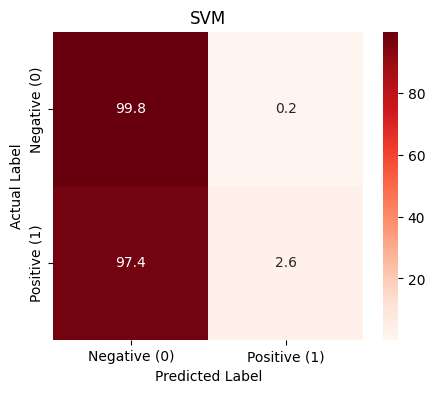

In [ ]:
evaluator_svm.plot_confusion_matrix(y_test, svm_y_pred, title = 'SVM', labels=[0, 1], figsize = (5,4))

In [ ]:
def summarize_svm(svm_model):
    print("SVC Model Summary")
    print("=" * 30)
    print(f"Kernel: {svm_model.kernel}")
    print(f"C (Regularization Parameter): {svm_model.C}")
    print(f"Gamma: {svm_model.gamma}")
    print(f"Number of Support Vectors: {len(svm_model.support_)}")
    print(f"Number of Support Vectors per Class: {svm_model.n_support_}")
    print(f"Class Labels: {svm_model.classes_}")
    print(f"Dual Coefficients Shape: {svm_model.dual_coef_.shape}")
    print(f"Intercept (Bias): {svm_model.intercept_}")
    print("=" * 30)

# Call the summary function
summarize_svm(svm_model)

SVC Model Summary
Kernel: rbf
C (Regularization Parameter): 1
Gamma: 5
Number of Support Vectors: 6064
Number of Support Vectors per Class: [5550  514]
Class Labels: [0 1]
Dual Coefficients Shape: (1, 6064)
Intercept (Bias): [-0.9088948]


## 3.2 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# Define and train the model
mlp_model = MLPClassifier(hidden_layer_sizes=(512, 256, 128),
                          activation='logistic',
                          learning_rate='adaptive',
                          learning_rate_init=0.001,
                          alpha = 0.05,
                          max_iter=100,
                          random_state=42)
mlp_model.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.05,
              hidden_layer_sizes=(512, 256, 128), learning_rate='adaptive',
              max_iter=100, random_state=42)

In [ ]:
evaluator_mlp = EvaluateModels()

# Evaluate MLP
print("\n--- MLP Metrics---")
mlp_metrics_df, mlp_y_pred = evaluator_mlp.evaluate_model_with_metrics(
    model=mlp_model,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)



--- MLP Metrics---

Train/Test Metrics

Train Accuracy :  97.27%
Test Accuracy  :  92.14%

Train Precision:  96.72%
Test Precision :  55.17%

Train Recall   :  68.87%
Test Recall    :  35.24%

Train F1 Score :  80.45%
Test F1 Score  :  43.01%

Train ROC AUC  :  98.50%
Test ROC AUC   :  85.27%


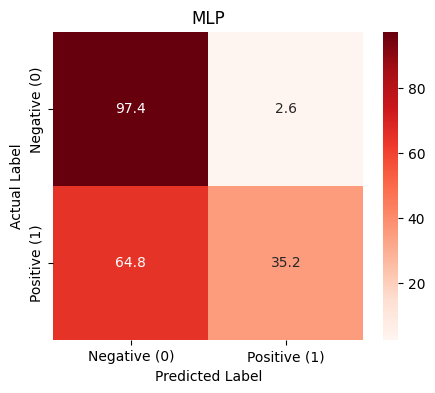

In [ ]:
evaluator_mlp.plot_confusion_matrix(y_test, mlp_y_pred, title = 'MLP', labels=[0, 1], figsize = (5,4))

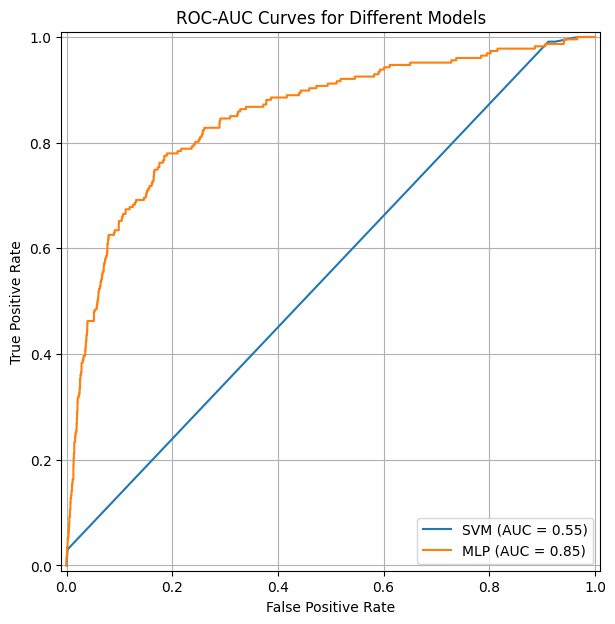

In [ ]:
models = [svm_model, mlp_model]
model_names = ['SVM', 'MLP']
plot_roc_auc(models, model_names, X_test, y_test)

In [ ]:
def summarize_mlp(mlp_model):
    print("MLPClassifier Summary")
    print("=" * 30)
    print(f"Number of layers: {len(mlp_model.coefs_)} (including input and output layers)")
    print(f"Hidden layers: {mlp_model.hidden_layer_sizes}")
    print(f"Activation function: {mlp_model.activation}")
    print(f"Solver: {mlp_model.solver}")
    print(f"Number of iterations: {mlp_model.n_iter_}")
    print(f"Number of outputs: {mlp_model.n_outputs_}")
    print(f"Classes: {mlp_model.classes_}")
    print(f"Training loss: {mlp_model.loss_:.4f}")
    print(f"Output activation function: {mlp_model.out_activation_}")
    print("=" * 30)

# Call the summary function
summarize_mlp(mlp_model)

MLPClassifier Summary
Number of layers: 4 (including input and output layers)
Hidden layers: (512, 256, 128)
Activation function: logistic
Solver: adam
Number of iterations: 100
Number of outputs: 1
Classes: [0 1]
Training loss: 0.1209
Output activation function: logistic
